<img align="right" width="400" src="https://www.fhnw.ch/de/++theme++web16theme/assets/media/img/fachhochschule-nordwestschweiz-fhnw-logo.svg" alt="FHNW Logo">


# Text Cleaning

by Fabian Märki

## Summary
The aim of this notebook is to show how text can be cleaned in order to prepare it as training data for a downstream nlp task. Additionally, it uses language detection to identify text that is written in an unexpected language (in this case other than german) so it can be removed from the data (since the trained model is supposed to work on german text).

This notebook contains assigments: <font color='red'>Questions are written in red.</font>

<a href="https://colab.research.google.com/github/markif/2021_HS_CAS_NLP_LAB_Notebooks/blob/master/02_a_Text_Cleaning.ipynb">
  <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
%%capture

!pip install 'fhnw-nlp-utils>=0.2.13,<0.3.0'

from fhnw.nlp.utils.processing import parallelize_dataframe
from fhnw.nlp.utils.processing import is_iterable
from fhnw.nlp.utils.storage import download
from fhnw.nlp.utils.storage import save_dataframe
from fhnw.nlp.utils.storage import load_dataframe


import pandas as pd
import numpy as np

In [2]:
from fhnw.nlp.utils.system import system_info
print(system_info())

OS name: posix
Platform name: Linux
Platform release: 5.11.0-40-generic
Python version: 3.6.9
Tensorflow version: 2.5.1
GPU is available


Download data and load it into a pandas dataframe.

In [3]:
download("https://drive.google.com/uc?id=17nFv7PKC6YJttZT4D1txk4CCUgduq3pc", "data/german_doctor_reviews_original.parq")
data = load_dataframe("data/german_doctor_reviews_original.parq")

Get a first impression...

In [4]:
print(data.shape)
data.head(3)

(357899, 2)


,text_original,rating
0,Ich bin franzose und bin seit ein paar Wochen ...,2.0
1,Dieser Arzt ist das unmöglichste was mir in me...,6.0
2,Hatte akute Beschwerden am Rücken. Herr Magura...,1.0


*Visualize* dataframe to see if there are empty cells/rows 

In [5]:
!pip install missingno

import missingno as msno

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


<AxesSubplot:>

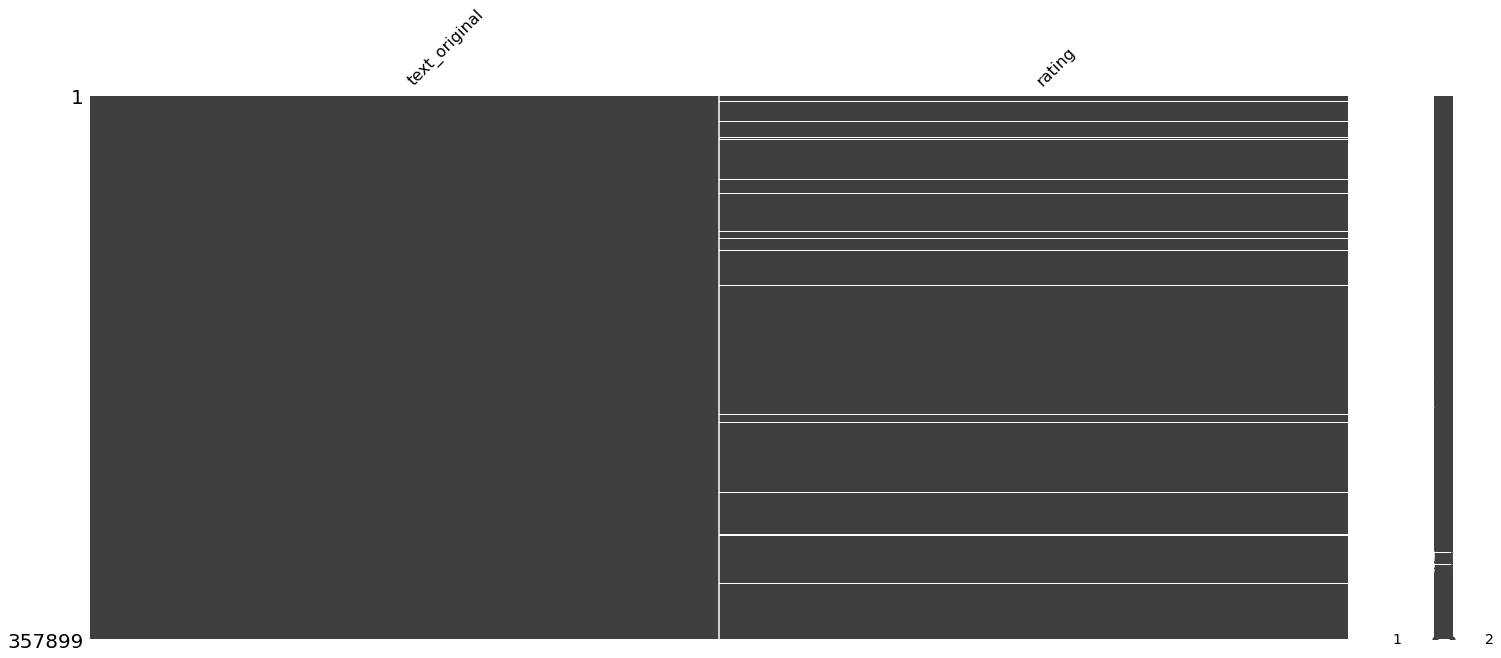

In [6]:
msno.matrix(data)

Check how many empty cells each column has.

In [7]:
for col in data.columns:
    print(col, data[col].isnull().sum())

text_original 0
rating 7658


Drop all empty rows (in some situations in can also make sense to amend the data - training data is valuable)

<font color='red'>**TASK: Drop all rows with an empty cell and store the result in `data`.**</font>

In [8]:
# TODO: !!! place your code here !!!
####################################


###################
# TODO: !!! end !!!

(350241, 2)

Check if text contains HTML tags.

In [9]:
data[data["text_original"].str.contains("/>", na=False)]

,text_original,rating
1,Dieser Arzt ist das unmöglichste was mir in me...,6.0
4,"Frau Dr. Vetter kenne ich seit vielen Jahren, ...",1.0
10,Bei der Ärztin selbst fühle ich micht stets gu...,2.0
12,Bin seit Januar bei Dr. Henning in Behandlung ...,1.0
13,1. Termin:<br />\n1 Stunde Wartezimmer + 2 min...,6.0
...,...,...
357886,Vor paar Tagen hatte ich eine Ultraschallunter...,4.0
357887,Unglaublich unfreundliche Praxis.<br />\nDie S...,5.0
357890,Ich war einige Jahre lang Patientin bei Dr. Ge...,4.0
357897,Ich bin schon länger bei Frau Dr. Sonntag in B...,4.0


It seems the text needs cleaning (remove html tags etc.).

<font color='red'>**TASK: Implement `clean_text` and provide the functionality as described in the function documentation.**</font>

Hints:
- focus on one functionality at a time
- you do not need to implement all functionalities (there is a reference solution)

Possible Inspirations:
- [Text Data Preprocessing: A Walkthrough in Python](https://www.kdnuggets.com/2018/03/text-data-preprocessing-walkthrough-python.html)
- [Beautiful Soup](https://beautiful-soup-4.readthedocs.io/en/latest) for html tag removal (see also [here](https://stackoverflow.com/a/12982689))

Possible Improvements:
- Replace numbers with a special token
- Replace ä, ö, ü and ß with ae, oe, ue and ss (see [here](https://jdvala.github.io/blog.io/thesis/2018/05/11/German-Preprocessing.html))
- Keep specific word forms only (e.g. all nouns and adjectives - see also [here](https://stackoverflow.com/a/15278298))
- German has many compound words like *Behandlungsdauer*, *Behandlungsempfehlung*, *Behandlungserfolg*, *Behandlungsergebnis* etc. which count for different words (and are thus considered unrelated) in a bag-of-words (BOW) model. Splitting such words could bring some improvement (e.g. see [here](https://github.com/dtuggener/CharSplit) and [here](https://github.com/TimKam/compound-word-splitter))

In [10]:
def clean_text(text, keep_punctuation=False):
    """Cleans text by removing html tags, non ascii chars, digits and optionally punctuation

    Parameters
    ----------
    text : str
        The text to clean
    keep_punctuation : bool
        Defines if punctuation should be kept
        
    Returns
    -------
    str
        The cleaned text
    """
        
    # TODO: !!! place your code here !!!
    ####################################
     
    
    ###################
    # TODO: !!! end !!!

    return text

Let's test some examples:

In [11]:
print(clean_text("Ein Arzt."))
print(clean_text("Ein Arzt.", keep_punctuation=True))
print(clean_text("Ein <br> Arzt."))
print(clean_text("Ein 0815 Arzt."))
print(clean_text("Ein Ârzt भारत"))

Ein Arzt 
Ein Arzt.
Ein Arzt 
Ein Arzt 
Ein Ârzt 


Clean the text in *text_original* and store it in *text*.

In [12]:
%%time

# drop in case of re-execution
data = data.drop(["text"], axis=1, errors='ignore')
data = parallelize_dataframe(data, clean_text, field_read="text_original", field_write="text", keep_punctuation=True)

CPU times: user 2.11 s, sys: 347 ms, total: 2.45 s
Wall time: 4.01 s


Double check... 

In [13]:
data[data["text"].str.contains("/>", na=False)]

,text_original,rating,text


Check for text without characters

In [14]:
data[~data["text"].str.contains("[A-Za-z]", na=False)]

,text_original,rating,text
510,".......,,,,,,,,,,,,,,,,,,,,,,",1.0,".......,,,,,,,,,,,,,,,,,,,,,,"
4763,----------------------------------------------...,3.0,
4928,1111111111111111111111111111111111111111111111...,1.0,
7489,.,1.0,.
17622,.................................................,5.0,.................................................
61490,.................................................,1.0,.................................................
204685,:-),1.0,
305991,... ... ... ... ... ... ... ... ... ... ... .....,1.0,... ... ... ... ... ... ... ... ... ... ... .....
309063,....!,5.0,....!


<font color='red'>**TASK: Drop all rows identified above and store the result in `data`.**</font>

In [15]:
# TODO: !!! place your code here !!!
####################################


###################
# TODO: !!! end !!!

(350232, 3)

Double check... 

In [16]:
data[~data["text"].str.contains("[A-Za-z]", na=False)]

,text_original,rating,text


We analyze german text. Let's try to identify non-german text.

<font color='red'>**TASK: Use fastText to implement `predict_lang` and predict the language of the provided text.**</font>

Possible Inspirations:
- [Identify text language](https://amitness.com/2019/07/identify-text-language-python)

In [17]:
!pip install fasttext

import fasttext

pretrained_model = "fasttext/supervised-models/lid.176.ftz"
download(url="https://dl.fbaipublicfiles.com/"+pretrained_model, path = pretrained_model)
model = fasttext.load_model(pretrained_model)

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [18]:
def predict_lang(text):
    """Predicts the language of a sentence

    Parameters
    ----------
    text : str
        The text to predict the language
    model: fasttext model
        Fasttext model to predict the language
        
    Returns
    -------
    str
        The predicted language (e.g. en, de, fr, it, es, ru, ...)
    """
    
    # TODO: !!! place your code here !!!
    ####################################
    # !!! this needs rework !!!
    return "en"


    ###################
    # TODO: !!! end !!!

In [19]:
%%time
data = parallelize_dataframe(data, predict_lang, n_jobs=6, field_read="text", field_write="lang")

# In case you get an error message "NameError: name 'model' is not defined" on your local machine
# you can also execute the above code as follows (without parallelization)
# data = pd.concat([data, data["text"].map(predict_lang).to_frame("lang")], axis=1)

CPU times: user 1.77 s, sys: 236 ms, total: 2.01 s
Wall time: 6.8 s


In [20]:
data.head(3)

,text_original,rating,text,lang
0,Ich bin franzose und bin seit ein paar Wochen ...,2.0,Ich bin franzose und bin seit ein paar Wochen ...,de
1,Dieser Arzt ist das unmöglichste was mir in me...,6.0,Dieser Arzt ist das unmöglichste was mir in me...,de
2,Hatte akute Beschwerden am Rücken. Herr Magura...,1.0,Hatte akute Beschwerden am Rücken. Herr Magura...,de


In [21]:
# get a summary of all predicted languages
data["lang"].value_counts()

de    349901
en       238
pl        17
nl        15
it         9
es         7
sv         6
hu         4
fi         4
al         3
da         3
fr         3
la         2
eu         2
pt         2
ru         2
sr         2
jb         2
ro         2
gl         1
no         1
nd         1
oc         1
tr         1
ko         1
sl         1
ba         1
Name: lang, dtype: int64

In [22]:
#pd.options.display.max_rows = None
data.loc[data["lang"] != "de"]

,text_original,rating,text,lang
5,Dieser Mann weiss was er tut.,1.0,Dieser Mann weiss was er tut.,en
1134,HERVORHAGEND::::::::::::::::::::::::::::::::::...,1.0,HERVORHAGEND,hu
2021,Bisher i.O.,2.0,Bisher .,en
2827,Katastrophe .........,6.0,Katastrophe .........,fr
3060,Super Kerl!!!! Super Praxisteam!!!! Super Prop...,1.0,Super Kerl!!!! Super Praxisteam!!!! Super Prop...,en
...,...,...,...,...
351661,Perfect doctor.Very competent and friendly,1.0,Perfect doctor Very competent and friendly,en
355577,Sehr Gut !,1.0,Sehr Gut !,sr
356190,Dr Dudik is the best gynecologist I have had. ...,1.0,Dr Dudik is the best gynecologist have had. An...,en
356684,He is very good and calm. Took care very well,1.0,He is very good and calm. Took care very well,en


Check each individual row to see if it really contains non german text. Alternatively, you might just want to delete all non german predicted rows (but remember, training data is valuable).

In [23]:
# handcrafted
delete_rows = [23666,32836,36789,37056,38863,41619,52122,59717,69225,70454,71649,75865,82514,89963,91433,93172,94829,94897,94965,101568,108747,115867,118969,120108,136188,137354,138723,143134,144365,146786,146971,148011,151936,154651,156848,157620,159678,161340,161340,174741,175238,179085,181464,181997,183575,185626,187205,187743,188892,191245,191729,192939,195947,196182,201934,203209,204340,207086,209502,213146,216070,216527,220184,221750,229629,230812,230927,231132,232964,235550,237095,237743,237932,238321,239181,242175,242671,243060,243227,250396,253465,253790,253819,254323,254760,255987,257958,260406,260446,266847,268197,270367,270374,270815,271952,272747,272836,273203,273924,275617,277243,279420,279477,280796,281613,281673,286529,287505,287768,287890,289947,293835,297010,298277,302994,303077,303479,312723,340714,341344,342168,342185,342222,342257,342369,342830,343944,344666,345929,347115,347539,348001,348727,351661,356190,356684]

In [24]:
data.loc[delete_rows]

,text_original,rating,text,lang
23666,Simply the best,1.0,Simply the best,en
32836,Ausprobieren! Beauty at its best.,1.0,Ausprobieren! Beauty at its best.,en
36789,Tooooooooooooop,1.0,Tooooooooooooop,en
37056,Exelente doctora.,1.0,Exelente doctora.,pt
38863,"Dr. Rösener has a professional staff, modern p...",1.0,"Dr. Rösener has professional staff, modern pra...",en
...,...,...,...,...
348001,Nothing I can complain about. Explanations wer...,1.0,Nothing can complain about. Explanations were ...,en
348727,Both doctor Kettner and doctor Harz are profes...,1.0,Both doctor Kettner and doctor Harz are profes...,en
351661,Perfect doctor.Very competent and friendly,1.0,Perfect doctor Very competent and friendly,en
356190,Dr Dudik is the best gynecologist I have had. ...,1.0,Dr Dudik is the best gynecologist have had. An...,en


In [25]:
data = data.drop(delete_rows)
data = data.drop(columns=["lang"])
data.shape

(350097, 3)

In [26]:
%%time
save_dataframe(data, "data/german_doctor_reviews_cleaned.parq")

CPU times: user 21 s, sys: 361 ms, total: 21.4 s
Wall time: 21.5 s
